In [148]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\kapilesh\Desktop\Data science problems\Titanic - Kaggle\Version 1&2 - Logreg, random forest\Data1.csv')

In [149]:
dataset = pd.read_csv(r'C:\Users\kapilesh\Desktop\Data science problems\Titanic - Kaggle\Original downloaded data\train.csv')

In [150]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
dataset=dataset.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [153]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [154]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [155]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [156]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean() + np.random.randint(dataset['Age'].std()))

In [157]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [158]:
from sklearn.utils import shuffle
dataset = shuffle(dataset).reset_index(drop = True)

In [159]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:, 0].values
#df=pd.DataFrame(X)

In [160]:
X

array([[2, 'male', 29.0, ..., 0, 27.7208, 'C'],
       [3, 'male', 2.0, ..., 1, 21.075, 'S'],
       [3, 'male', 35.69911764705882, ..., 0, 19.9667, 'S'],
       ..., 
       [3, 'male', 27.0, ..., 0, 8.6625, 'S'],
       [1, 'male', 65.0, ..., 0, 26.55, 'S'],
       [2, 'male', 27.0, ..., 0, 13.0, 'S']], dtype=object)

In [161]:
y

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1,

In [162]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
#onehotencoder = OneHotEncoder(categorical_features = [1,6])
#X = onehotencoder.fit_transform(X).toarray()

In [163]:
X

array([[2, 1, 29.0, ..., 0, 27.7208, 0],
       [3, 1, 2.0, ..., 1, 21.075, 2],
       [3, 1, 35.69911764705882, ..., 0, 19.9667, 2],
       ..., 
       [3, 1, 27.0, ..., 0, 8.6625, 2],
       [1, 1, 65.0, ..., 0, 26.55, 2],
       [2, 1, 27.0, ..., 0, 13.0, 2]], dtype=object)

In [164]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 0)

In [165]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\kapilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [166]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [167]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)

In [168]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

In [169]:
cm

array([[328,  61],
       [ 60, 175]])

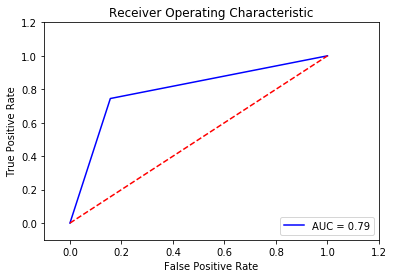

In [170]:
#ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
# Fitting logistic regression classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

In [173]:
cm2 = confusion_matrix(y_test, y_pred2)

In [174]:
cm2

array([[329,  60],
       [ 61, 174]])

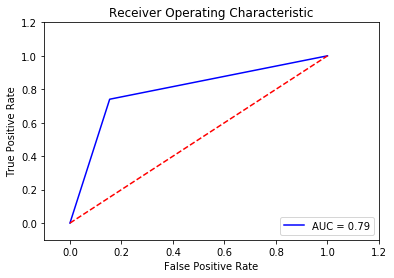

In [175]:
#ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now let's make predictions for the data which we're asked to predict

In [176]:
dataset2 = pd.read_csv(r'C:\Users\kapilesh\Desktop\Data science problems\Titanic - Kaggle\Original downloaded data\test.csv')

In [177]:
dataset2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
dataset2 = dataset2.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [179]:
dataset2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [180]:
dataset2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [181]:
dataset2['Fare'] = dataset2['Fare'].fillna(dataset2['Fare'].mean()) 

In [182]:
dataset2['Age'] = dataset2['Age'].fillna(dataset2['Age'].mean() + np.random.randint(dataset2['Age'].std())) 

In [183]:
X_test2 = dataset2.iloc[:,:].values

In [184]:
labelencoder_X2 = LabelEncoder()
X_test2[:, 1] = labelencoder_X2.fit_transform(X_test2[:, 1])
X_test2[:, 6] = labelencoder_X2.fit_transform(X_test2[:, 6])

In [185]:
y_pred3 = classifier2.predict(X_test2)

In [132]:
finaldf = pd.DataFrame(y_pred3)
finaldf.to_csv("predicted_rev5.csv")